In [1]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
def aws():
    try:
        connection = psycopg2.connect(user='postgres',
                                      password='password',
                                      host='almau-students.cmwfjvlei66t.eu-central-1.rds.amazonaws.com',
                                      port='5432',
                                      database='postgres')
        print('connected')
    except(Exception, psycopg2.Error) as error:
        connection = ''
        print(error)
    return connection

In [3]:
df = pd.read_sql_query('select * from flight_delays_1', aws())
# df = pd.read_csv('flight_delays 1.csv', header = 0, sep=',')

connected


In [4]:
df = df.rename({'month': 'Month', 'dayofmonth': 'DayofMonth', 'dayofweek': 'DayOfWeek', 'deptime': 'DepTime', 'uniquecarrier': 'UniqueCarrier', 'origin': 'Origin',
                       'dest': 'Dest', 'distance': 'Distance', 'dep_delayed_15min': 'dep_delayed_15min'}, axis=1)

In [5]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [6]:
def do_norm_table():
    df['Month']= df['Month'].apply(lambda x: x.split('-')[1])
    df['Month'] = df['Month'].apply(int)
    df['DayofMonth'] = df['DayofMonth'].apply(lambda x: x.split('-')[1])
    df['DayofMonth'] = df['DayofMonth'].apply(int)
    df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: x.split('-')[1])
    df['DayOfWeek'] = df['DayOfWeek'].apply(int)

In [7]:
do_norm_table()
def no_yes(val):
    if 'Y' in val:
        return 1
    else:
        return 0
df['dep_delayed_15min'] = df['dep_delayed_15min'].apply(lambda x: no_yes(x))

df_delay = df[df.dep_delayed_15min==1]
df_nodelay = df[df['dep_delayed_15min']==0]
delays = len(df_delay)
nodelays = len(df_nodelay)
airlines = sorted(df.UniqueCarrier.unique())
origins= sorted(df.Origin.unique(), reverse=True)
destinations= sorted(df.Dest.unique(), reverse=True)
numAirlines= len(airlines)
numOrigins= len(origins)
numDestinations = len(destinations)
minDist = df.Distance.min()
maxDist = df.Distance.max()

In [8]:
print('Количество задержек - ',delays)
print('Количество без задержек - ',nodelays)
print('Список Кодов аэропорта ИАТА - ',airlines)
print('Список эропортов откуда был вылет - ',origins)
# print('Место назначения - ',destinations) # ПОВТОРЯЕТ origins
print('Количество Авиакомпаний - ',numAirlines)
print('Количество аэропортов откуда был вылет - ',numOrigins)
print('Количество аэропортов куда был вылет - ',numDestinations)
print('Минимальная дистранция в км - ',minDist)
print('Максимальная дистранция в км - ',maxDist)

Количество задержек -  19044
Количество без задержек -  80956
Список Кодов аэропорта ИАТА -  ['AA', 'AQ', 'AS', 'B6', 'CO', 'DH', 'DL', 'EV', 'F9', 'FL', 'HA', 'HP', 'MQ', 'NW', 'OH', 'OO', 'TZ', 'UA', 'US', 'WN', 'XE', 'YV']
Список эропортов откуда был вылет -  ['YUM', 'YAK', 'XNA', 'WYS', 'WRG', 'VPS', 'VLD', 'VIS', 'VCT', 'TYS', 'TYR', 'TXK', 'TWF', 'TVC', 'TUS', 'TUP', 'TUL', 'TRI', 'TPA', 'TOL', 'TLH', 'TEX', 'SYR', 'SWF', 'SUN', 'STX', 'STT', 'STL', 'SRQ', 'SPS', 'SPI', 'SNA', 'SMX', 'SMF', 'SLC', 'SJU', 'SJT', 'SJC', 'SIT', 'SHV', 'SGU', 'SGF', 'SFO', 'SEA', 'SDF', 'SCE', 'SCC', 'SBP', 'SBN', 'SBA', 'SAV', 'SAT', 'SAN', 'RSW', 'RST', 'ROC', 'ROA', 'RNO', 'RIC', 'RFD', 'RDU', 'RDM', 'RDD', 'RAP', 'PWM', 'PVD', 'PSP', 'PSG', 'PSE', 'PSC', 'PNS', 'PIT', 'PIH', 'PIE', 'PIA', 'PHX', 'PHL', 'PHF', 'PFN', 'PDX', 'PBI', 'OXR', 'OTZ', 'ORF', 'ORD', 'ONT', 'OME', 'OMA', 'OKC', 'OGG', 'OAK', 'OAJ', 'MYR', 'MTJ', 'MSY', 'MSP', 'MSO', 'MSN', 'MRY', 'MQT', 'MOT', 'MOD', 'MOB', 'MLU', 'MLI', '

In [9]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null int64
DayofMonth           100000 non-null int64
DayOfWeek            100000 non-null int64
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null int64
dtypes: int64(6), object(3)
memory usage: 6.9+ MB


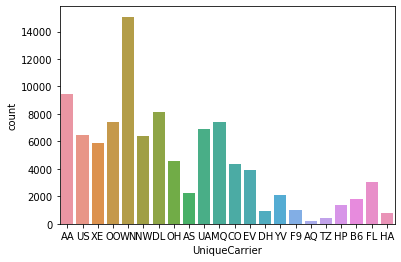

In [11]:
sns.countplot(x='UniqueCarrier', data=df)

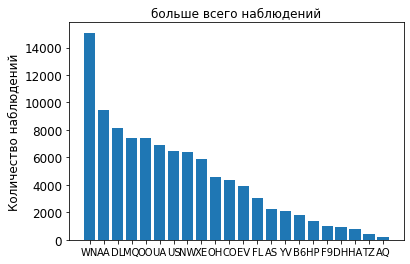

In [161]:
def dict_sort(my_dict):
    keys = []
    values = []
    my_dict = sorted(my_dict.items(), key=lambda x:x[1], reverse=True)
    for k, v in my_dict:
        keys.append(k)
        values.append(v)
    return (keys,values)
count = pd.value_counts(df['UniqueCarrier'].values, sort=True)
keys, values = dict_sort(dict(count))    
TOP = len(keys)
plt.title('больше всего наблюдений', fontsize=12)
plt.bar(np.arange(TOP), values, )
plt.xticks(np.arange(TOP), keys, rotation=0, fontsize=10)
plt.yticks(fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)
plt.show()

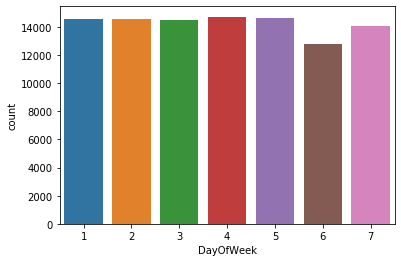

In [12]:
sns.countplot(x="DayOfWeek",data=df)

0    81.0
1    19.0
Name: dep_delayed_15min, dtype: float64


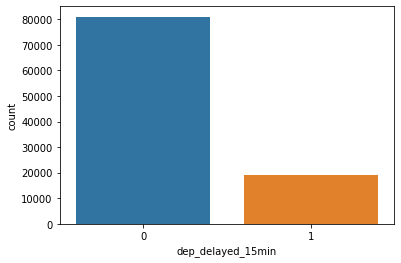

In [13]:
sns.countplot(x="dep_delayed_15min",data=df)
procentage = round(df['dep_delayed_15min'].value_counts() * 100 / len(df),1)
print(procentage)

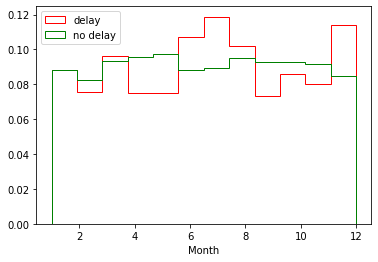

In [105]:
Ycol = ["red"]
Ncol = ["green"]
plt.hist(df_delay.Month,bins=12,align="mid", color=Ycol,histtype="step",label="delay",density=True)
plt.hist(df_nodelay.Month,bins=12,align="mid", color=Ncol,histtype="step",label="no delay",density=True)
plt.xlabel("Month")
plt.legend(prop={'size': 10},loc="upper left")

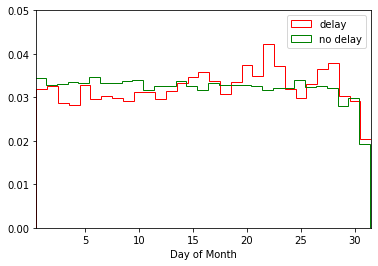

In [106]:
plt.hist(df_delay.DayofMonth,bins=31,range=[0.5,31.5],align="mid",
               color=Ycol,histtype="step",label="delay",density=True)
plt.hist(df_nodelay.DayofMonth,bins=31,range=[0.4,31.4],align="mid",
               color=Ncol,histtype="step",label="no delay",density=True)
plt.xlabel("Day of Month")
plt.xlim(0.5,31.5)
plt.ylim(0.0,0.05)
plt.legend(prop={'size': 10},loc="upper right")

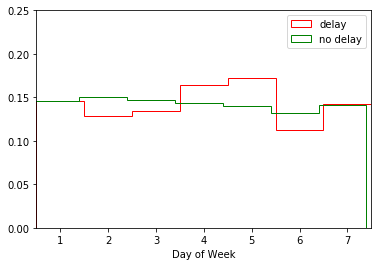

In [107]:
plt.hist(df_delay.DayOfWeek,bins=7,range=[0.5,7.5],align="mid",
               color=Ycol,histtype="step",label="delay",density=True)
plt.hist(df_nodelay.DayOfWeek,bins=7,range=[0.4,7.4],align="mid",
               color=Ncol,histtype="step",label="no delay",density=True)
plt.xlabel("Day of Week")
plt.xlim(0.5,7.5)
plt.ylim(0.0,0.25)
plt.legend(prop={'size': 10},loc="upper right")

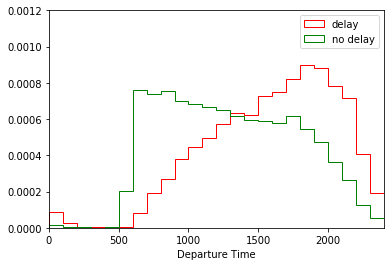

In [108]:
plt.hist(df_delay.DepTime,bins=24,range=[0,2400],
               color=Ycol,histtype="step",label="delay",density=True)
plt.hist(df_nodelay.DepTime,bins=24,range=[0,2400],
               color=Ncol,histtype="step",label="no delay",density=True)
plt.xlabel("Departure Time")
plt.xlim(0.0,2400.0)
plt.ylim(0.0,0.0012)
plt.legend(prop={'size': 10},loc="upper right")

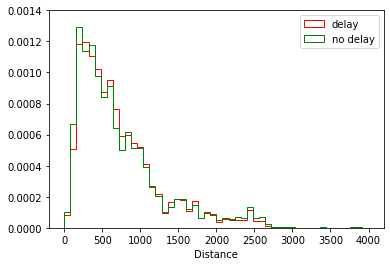

In [109]:
plt.hist(df_delay.Distance,bins=50,range=[0,4000],
               color=Ycol,histtype="step",label="delay",density=True)
plt.hist(df_nodelay.Distance,bins=50,range=[0,4000],
               color=Ncol,histtype="step",label="no delay",density=True)
plt.xlabel("Distance")
plt.ylim(0.0,0.0014)
plt.legend(prop={'size': 10},loc="upper right")

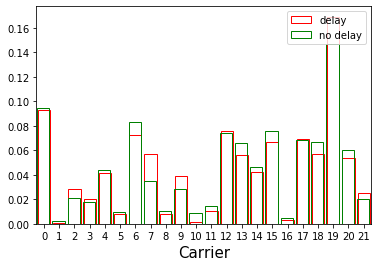

In [159]:
bins      = np.arange(len(airlines))
heights   = df.groupby(["UniqueCarrier","dep_delayed_15min"]).size()
mulind    = pd.MultiIndex.from_product([airlines, [False, True]])
heights   = heights.reindex(mulind).replace(np.nan, 0)
heights1  = [heights[carrier,True] for carrier in airlines]
heights1  = [float(height)/sum(heights1) for height in heights1]
heights2  = [heights[carrier,False] for carrier in airlines]
heights2  = [float(height)/sum(heights2) for height in heights2]
plt.bar(bins,heights1,align="center",edgecolor=Ycol,color=["none"],label="delay")
plt.bar(bins-0.05,heights2,align="center",edgecolor=Ncol,color=["none"],label="no delay")
plt.xlabel("Carrier",fontsize=15)
plt.xticks(bins)
plt.xlim([-0.5,21.5])
plt.legend(prop={'size': 10},loc="upper right")

In [19]:
df2 = pd.get_dummies(df,drop_first=False)
print(df2.describe(percentiles=[], include="all"))

               Month     DayofMonth     DayOfWeek        DepTime  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean        6.537640      15.703850       3.95183    1341.523880   
std         3.413447       8.793931       1.99164     476.378445   
min         1.000000       1.000000       1.00000       1.000000   
50%         7.000000      16.000000       4.00000    1330.000000   
max        12.000000      31.000000       7.00000    2534.000000   

           Distance  dep_delayed_15min  UniqueCarrier_AA  UniqueCarrier_AQ  \
count  100000.00000       100000.00000      100000.00000     100000.000000   
mean      729.39716            0.19044           0.09418          0.002340   
std       574.61686            0.39265           0.29208          0.048317   
min        30.00000            0.00000           0.00000          0.000000   
50%       575.00000            0.00000           0.00000          0.000000   
max      4962.00000            1.00000           1.0000

In [20]:
df2

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,...,Dest_TYS,Dest_VCT,Dest_VIS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YUM
0,8,21,7,1934,732,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,20,3,1548,834,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,2,5,1422,416,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,25,6,1015,872,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,7,6,1828,423,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,199,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,1,18,3,804,884,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,1,24,2,1901,1076,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,4,27,4,1515,140,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Convert pandas dataframe to its numpy representation, separating out features from target variable.
features = df2.columns.values.tolist()
features.remove("dep_delayed_15min")
X = df2.as_matrix(columns=features)
Y = np.array([int(i) for i in df2["dep_delayed_15min"].tolist()])

# Create training and test sets, with desired proportions.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print("Training set size: %i, test set size: %i, total: %i" %(len(y_train),len(y_test),len(Y)))

F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


Training set size: 70000, test set size: 30000, total: 100000


In [94]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=50, max_depth=20, class_weight="balanced_subsample")

%time rf2.fit(X_train, y_train)

Wall time: 17.6 s


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [95]:
print("Mean accuracy on Training set: %s" %rf2.score(X_train, y_train))
print("Mean accuracy on Test set:     %s" %rf2.score(X_test, y_test))

Mean accuracy on Training set: 0.6931142857142857
Mean accuracy on Test set:     0.6406


Number of test values = 30000
Number of test values equal to True = 5731
Delays in training set: 13313, no-delays: 56687
Delays in test set: 5731, no-delays: 24269


Text(0.5, 1.0, 'Test')

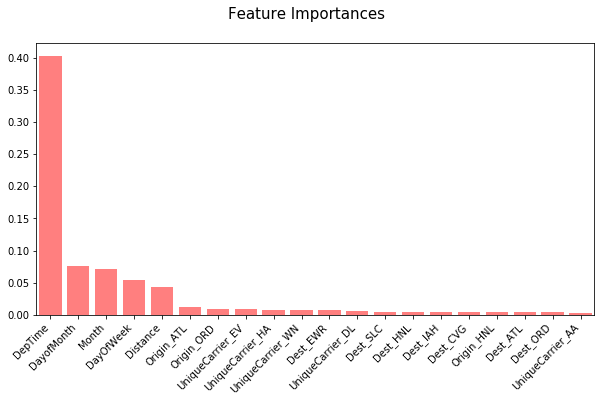

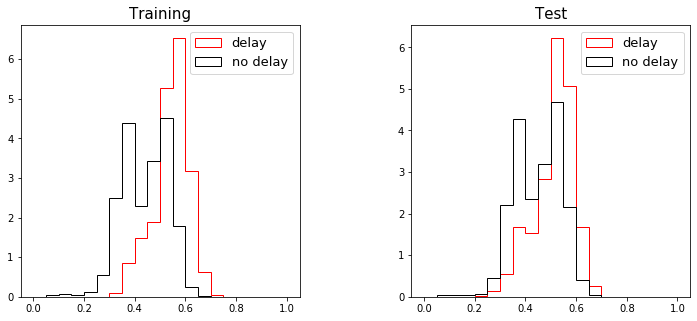

In [102]:
print('Number of test values = %i' %len(y_test))
print('Number of test values equal to True = %i' %(len([val for val in y_test if val])))

y_test_pred    = [p2 for [p1,p2] in rf2.predict_proba(X_test)]
y_train_pred   = [p2 for [p1,p2] in rf2.predict_proba(X_train)]

# Compute and plot feature importances
importances = rf2.feature_importances_
indices     = np.argsort(importances)[::-1]
n_features  = min(20,indices.size)
bins        = np.arange(n_features)
x_labels    = np.array(features)[indices][:n_features]
fig, axes   = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

plt.suptitle("Feature Importances", fontsize=15)
axes.bar(bins, importances[indices][:n_features], align="center", color="red", alpha=0.5)
axes.set_xticks(bins)
axes.set_xticklabels(x_labels, ha="right", rotation=45.)
axes.set_xlim([-0.5,bins.size-0.5])

#fig.savefig('FeatureImportances.png', dpi=200, bbox_inches='tight')

# Histogram random forest output probabilities
y_train_pred_1 = [pred for (pred,truth) in zip(y_train_pred,y_train) if truth==1]
y_train_pred_0 = [pred for (pred,truth) in zip(y_train_pred,y_train) if truth==0]
y_test_pred_1  = [pred for (pred,truth) in zip(y_test_pred,y_test) if truth==1]
y_test_pred_0  = [pred for (pred,truth) in zip(y_test_pred,y_test) if truth==0]
print("Delays in training set: %i, no-delays: %i" %(len(y_train_pred_1),len(y_train_pred_0)))
print("Delays in test set: %i, no-delays: %i" %(len(y_test_pred_1),len(y_test_pred_0)))

bin_edges        = np.linspace(0.0,1.0,11)
hist1,bin_edges1 = np.histogram(y_train_pred_1, bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(y_train_pred_0, bins=bin_edges, density=False)

hist1,bin_edges1 = np.histogram(y_test_pred_1, bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(y_test_pred_0, bins=bin_edges, density=False)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plt.subplots_adjust(wspace=0.40)
axes[0].hist(y_train_pred_1, bins=20, range=[0.0,1.0], color=Ycol, histtype="step", label="delay", density=True)
axes[0].hist(y_train_pred_0, bins=20, range=[0.0,1.0], color=Ncol, histtype="step", label="no delay", density=True)
axes[0].legend(prop={'size': 13})
axes[0].set_title("Training", fontsize=15)
axes[1].hist(y_test_pred_1, bins=20, range=[0.0,1.0], color=Ycol, histtype="step", label="delay", density=True)
axes[1].hist(y_test_pred_0, bins=20, range=[0.0,1.0], color=Ncol, histtype="step", label="no delay", density=True)
axes[1].legend(prop={'size': 13})
axes[1].set_title("Test", fontsize=15)

In [25]:
df2

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,...,Dest_TYS,Dest_VCT,Dest_VIS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YUM
0,8,21,7,1934,732,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,20,3,1548,834,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,2,5,1422,416,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,25,6,1015,872,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,7,6,1828,423,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,199,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,1,18,3,804,884,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,1,24,2,1901,1076,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,4,27,4,1515,140,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
Y = df['dep_delayed_15min']

In [27]:
X = df[['DepTime','Distance', 'DayOfWeek', 'DayofMonth']]

In [28]:
model = LinearRegression()

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [30]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model.coef_

array([2.03721006e-04, 6.50529015e-07, 1.98851520e-03, 1.15436712e-03])

In [32]:
metrics.mean_absolute_error(model.predict(X_test),Y_test)

0.2892112868547158

In [33]:
metrics.mean_squared_error(model.predict(X_test),Y_test)

0.1443823552289102

In [34]:
# metrics.mean_squared_log_error(model.predict(X_test),Y_test)

In [35]:
metrics.r2_score(model.predict(X_test),Y_test)

-14.113479148380218

In [36]:
model.predict(X_test)

array([0.05241116, 0.21594839, 0.02914529, ..., 0.34562163, 0.19132963,
       0.15041361])

In [37]:
model.score(X_test, Y_test)

0.05543286351815668

In [38]:
model.score(X_train, Y_train)

0.06170777188778853

In [39]:
print(metrics.mean_absolute_error(model.predict(X_test),Y_test))
print(metrics.mean_squared_error(model.predict(X_test),Y_test))

0.2892112868547158
0.1443823552289102


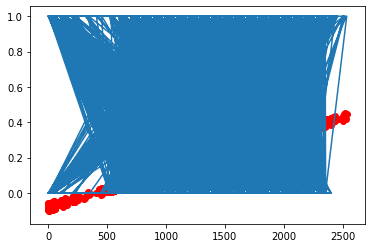

In [40]:
plt.plot(df['DepTime'],Y)
plt.scatter(df['DepTime'],model.predict(X),c='red')

(array([  369.,    83.,  9841., 17657., 17120., 16837., 17171., 14280.,
         6268.,   374.]),
 array([-0.10426418, -0.04878554,  0.0066931 ,  0.06217175,  0.11765039,
         0.17312903,  0.22860767,  0.28408631,  0.33956495,  0.39504359,
         0.45052224]),
 <a list of 1 Patch objects>)

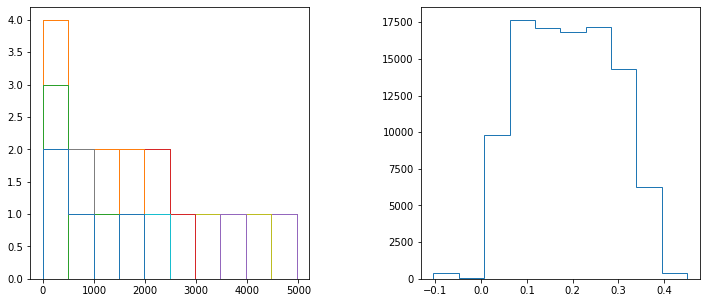

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plt.subplots_adjust(wspace=0.40)
axes[0].hist(X, histtype="step", bins=10)
axes[1].hist(model.predict(X), histtype="step", bins=10)

Text(0.5, 1.0, 'Test Set')

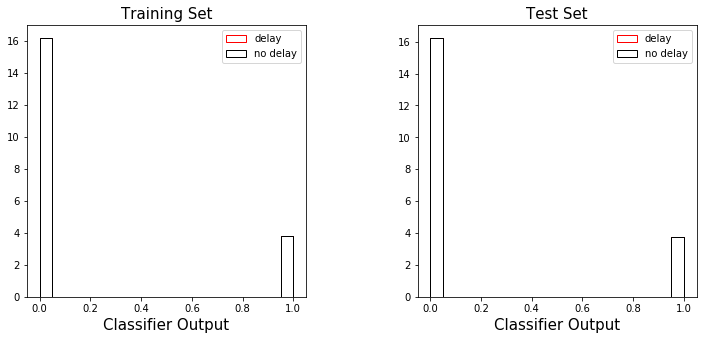

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plt.subplots_adjust(wspace=0.40)
axes[0].hist(Y_train, bins=20, range=[0.0,1.0], color=Ycol, histtype="step", label="delay", density=True)
axes[0].hist(Y_train, bins=20, range=[0.0,1.0], color=Ncol, histtype="step", label="no delay", density=True)
axes[0].set_xlabel("Classifier Output", fontsize=15)
axes[0].legend(prop={'size': 10}, loc="upper right")
axes[0].set_title("Training Set", fontsize=15)
axes[1].hist(Y_test, bins=20, range=[0.0,1.0], color=Ycol, histtype="step", label="delay", density=True)
axes[1].hist(Y_test, bins=20, range=[0.0,1.0], color=Ncol, histtype="step", label="no delay", density=True)
axes[1].set_xlabel("Classifier Output", fontsize=15)
axes[1].legend(prop={'size': 10}, loc="upper right")
axes[1].set_title("Test Set", fontsize=15)

In [43]:
days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
def day_31_to_365(x):
    days_365 = days_in_month[:x['Month']-1].sum() + x['DayofMonth']
    return days_365

df['DayofMonth'] = df.apply(day_31_to_365,axis = 1)
df['WEEK'] = df['DayofMonth']//7

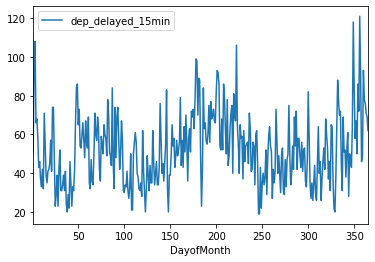

In [162]:
df = df[[x for x in df.columns if 'dep_delayed_15min' in x] + ['DayofMonth']]
df.groupby('DayofMonth').sum().plot()

In [44]:
def dadada(val):
    if val <= 2400:
        g= df['DepTime'] = np.ceil(val/600)
        return g
    else:
        f = df['DepTime'] = np.round(val/600)
        return f
df['DepTime'] = df['DepTime'].apply(lambda x: round(dadada(x)),0)

In [45]:
Delay_vs_Day_of_Week = pd.DataFrame({'delays' : df.groupby(['DayOfWeek'])['dep_delayed_15min'].mean()}).reset_index()
Delay_vs_WEEK = pd.DataFrame({'delays' : df.groupby(['WEEK'])['dep_delayed_15min'].mean()}).reset_index()
Delay_vs_AIRLINE = pd.DataFrame({'delays' : df.groupby(['UniqueCarrier'])['dep_delayed_15min'].mean()})
Delay_vs_SCHEDULED_DEPARTURE = pd.DataFrame({'delays' : df.groupby(['DepTime'])['dep_delayed_15min'].mean()}).reset_index()

[Text(0, 0, '00:00 - 06:00'),
 Text(0, 0, '06:00 - 12:00'),
 Text(0, 0, '12:00 - 18:00'),
 Text(0, 0, '18:00 - 00:00')]

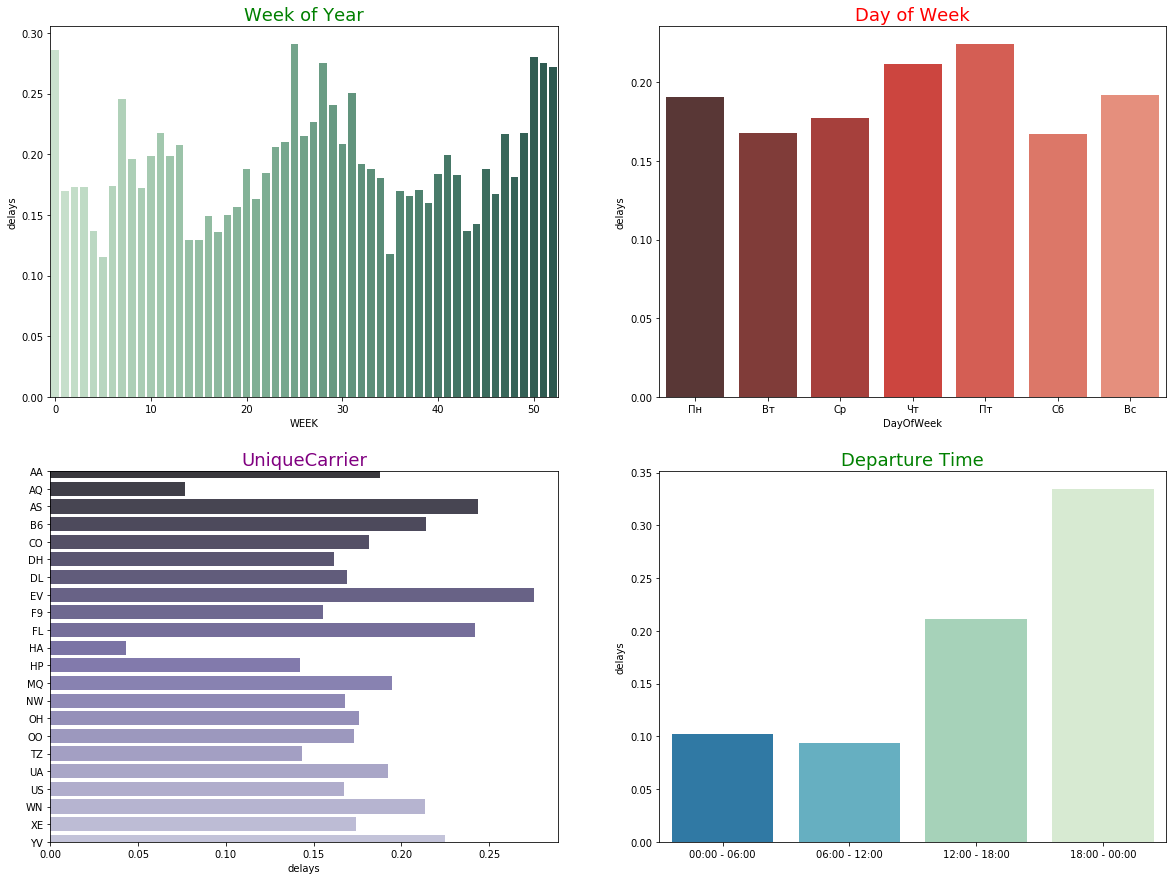

In [46]:
fig = plt.figure(figsize=(20, 15))

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Week of Year', fontsize=18, color="green")
sns.barplot(x="WEEK", y="delays", data=Delay_vs_WEEK, palette="ch:2.5,-.2,dark=.3", ax = sub1)
sub1.set_xticks(list(range(0,52,10)))
sub1.set_xticklabels(list(range(0,52,10)))

sub2 = fig.add_subplot(222)
sub2.set_title('Day of Week', fontsize=18, color="red")
sns.barplot(x="DayOfWeek", y="delays", data=Delay_vs_Day_of_Week, palette="Reds_d", ax = sub2)
sub2.set_xticklabels(['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])

sub3 = fig.add_subplot(223)
sub3.set_title('UniqueCarrier', fontsize=18, color="purple")
sns.barplot(y = list(range(len(Delay_vs_AIRLINE))), x=Delay_vs_AIRLINE['delays'], palette="Purples_d", ax = sub3, orient="h")
sub3.set_yticks(range(len(Delay_vs_AIRLINE)))
sub3.set_yticklabels(Delay_vs_AIRLINE.index)

sub4 = fig.add_subplot(224)
sns.barplot(x = list(range(len(Delay_vs_SCHEDULED_DEPARTURE))), y=Delay_vs_SCHEDULED_DEPARTURE['delays'], palette="GnBu_r", ax = sub4)
sub4.set_title('Departure Time', fontsize=18, color="green")
sub4.set_xticks([0, 1, 2, 3])
sub4.set_xticklabels(['00:00 - 06:00','06:00 - 12:00','12:00 - 18:00','18:00 - 00:00'])

In [47]:
features = df2.columns.values.tolist()

In [48]:
features

['Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'Distance',
 'dep_delayed_15min',
 'UniqueCarrier_AA',
 'UniqueCarrier_AQ',
 'UniqueCarrier_AS',
 'UniqueCarrier_B6',
 'UniqueCarrier_CO',
 'UniqueCarrier_DH',
 'UniqueCarrier_DL',
 'UniqueCarrier_EV',
 'UniqueCarrier_F9',
 'UniqueCarrier_FL',
 'UniqueCarrier_HA',
 'UniqueCarrier_HP',
 'UniqueCarrier_MQ',
 'UniqueCarrier_NW',
 'UniqueCarrier_OH',
 'UniqueCarrier_OO',
 'UniqueCarrier_TZ',
 'UniqueCarrier_UA',
 'UniqueCarrier_US',
 'UniqueCarrier_WN',
 'UniqueCarrier_XE',
 'UniqueCarrier_YV',
 'Origin_ABE',
 'Origin_ABI',
 'Origin_ABQ',
 'Origin_ABY',
 'Origin_ACK',
 'Origin_ACT',
 'Origin_ACV',
 'Origin_ACY',
 'Origin_ADK',
 'Origin_ADQ',
 'Origin_AEX',
 'Origin_AGS',
 'Origin_AKN',
 'Origin_ALB',
 'Origin_AMA',
 'Origin_ANC',
 'Origin_APF',
 'Origin_ASE',
 'Origin_ATL',
 'Origin_ATW',
 'Origin_AUS',
 'Origin_AVL',
 'Origin_AVP',
 'Origin_AZO',
 'Origin_BDL',
 'Origin_BET',
 'Origin_BFL',
 'Origin_BGM',
 'Origin_BGR',
 'Origin_BHM',
 '

In [49]:
df2_delay   = df2[df2.dep_delayed_15min==True]
df2_nodelay = df2[df2.dep_delayed_15min==False]

In [50]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,WEEK
0,8,233,7,4,AA,ATL,DFW,732,0,33
1,4,110,3,3,US,PIT,MCO,834,0,15
2,9,245,5,3,XE,RDU,CLE,416,0,35
3,11,329,6,2,OO,DEN,MEM,872,0,47
4,10,280,6,4,WN,MDW,OMA,423,1,40
...,...,...,...,...,...,...,...,...,...,...
99995,5,124,3,3,OO,SFO,RDD,199,0,17
99996,1,18,3,2,CO,EWR,DAB,884,0,2
99997,1,24,2,4,NW,DTW,IAH,1076,0,3
99998,4,117,4,3,MQ,DFW,GGG,140,0,16


In [51]:
# from sklearn.preprocessing import LabelBinarizer

# WEEK_LabBin = LabelBinarizer()
# WEEK_LabBin.fit(df['WEEK'])
# WEEK_binarized = np.array(WEEK_LabBin.transform(df['WEEK']))
# WEEK_binarized_orig = np.array(WEEK_LabBin.transform(df['WEEK']))


# DAY_OF_WEEK_LabBin = LabelBinarizer()
# DAY_OF_WEEK_LabBin.fit(df['DayOfWeek'])
# DAY_OF_WEEK_binarized = np.array(DAY_OF_WEEK_LabBin.transform(df['DayOfWeek']))
# DAY_OF_WEEK_binarized_orig = np.array(DAY_OF_WEEK_LabBin.transform(df['DayOfWeek']))


# AIRLINE_LabBin = LabelBinarizer()
# AIRLINE_LabBin.fit(df['UniqueCarrier'])
# AIRLINE_binarized = np.array(AIRLINE_LabBin.transform(df['UniqueCarrier']))
# AIRLINE_binarized_orig = np.array(AIRLINE_LabBin.transform(df['UniqueCarrier']))


# ORIGIN_AIRPORT_LabBin = LabelBinarizer()
# ORIGIN_AIRPORT_LabBin.fit(df['Origin'])
# ORIGIN_AIRPORT_binarized = np.array(DAY_OF_WEEK_LabBin.transform(df['Origin']))
# ORIGIN_AIRPORT_binarized_orig = np.array(DAY_OF_WEEK_LabBin.transform(df['Origin']))


# DESTINATION_AIRPORT_LabBin = LabelBinarizer()
# DESTINATION_AIRPORT_LabBin.fit(df['Dest'])
# DESTINATION_AIRPORT_binarized = np.array(DESTINATION_AIRPORT_LabBin.transform(df['Dest']))
# DESTINATION_AIRPORT_binarized_orig = np.array(DESTINATION_AIRPORT_LabBin.transform(df['Dest']))


# # SCHEDULED_DEPARTURE_LabBin = LabelBinarizer()
# # SCHEDULED_DEPARTURE_LabBin.fit(df['DepTime'])
# # SCHEDULED_DEPARTURE_binarized = np.array(SCHEDULED_DEPARTURE_LabBin.transform(df['DepTime']))
# # SCHEDULED_DEPARTURE_binarized_orig = np.array(SCHEDULED_DEPARTURE_LabBin.transform(df['DepTime']))


# # flights_binarized will contain all data in sparce matrix form
# flights_binarized = np.concatenate((WEEK_binarized,DAY_OF_WEEK_binarized,AIRLINE_binarized,ORIGIN_AIRPORT_binarized,
#                                     DESTINATION_AIRPORT_binarized),axis=1)
# flights_binarized_orig = np.concatenate((WEEK_binarized_orig,DAY_OF_WEEK_binarized_orig,AIRLINE_binarized_orig,ORIGIN_AIRPORT_binarized_orig,
#                                     DESTINATION_AIRPORT_binarized_orig),axis=1)

# print(flights_binarized.shape)
# print(flights_binarized_orig.shape)

In [52]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,WEEK
0,8,233,7,4,AA,ATL,DFW,732,0,33
1,4,110,3,3,US,PIT,MCO,834,0,15
2,9,245,5,3,XE,RDU,CLE,416,0,35
3,11,329,6,2,OO,DEN,MEM,872,0,47
4,10,280,6,4,WN,MDW,OMA,423,1,40
...,...,...,...,...,...,...,...,...,...,...
99995,5,124,3,3,OO,SFO,RDD,199,0,17
99996,1,18,3,2,CO,EWR,DAB,884,0,2
99997,1,24,2,4,NW,DTW,IAH,1076,0,3
99998,4,117,4,3,MQ,DFW,GGG,140,0,16


F:\Programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\Programs\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


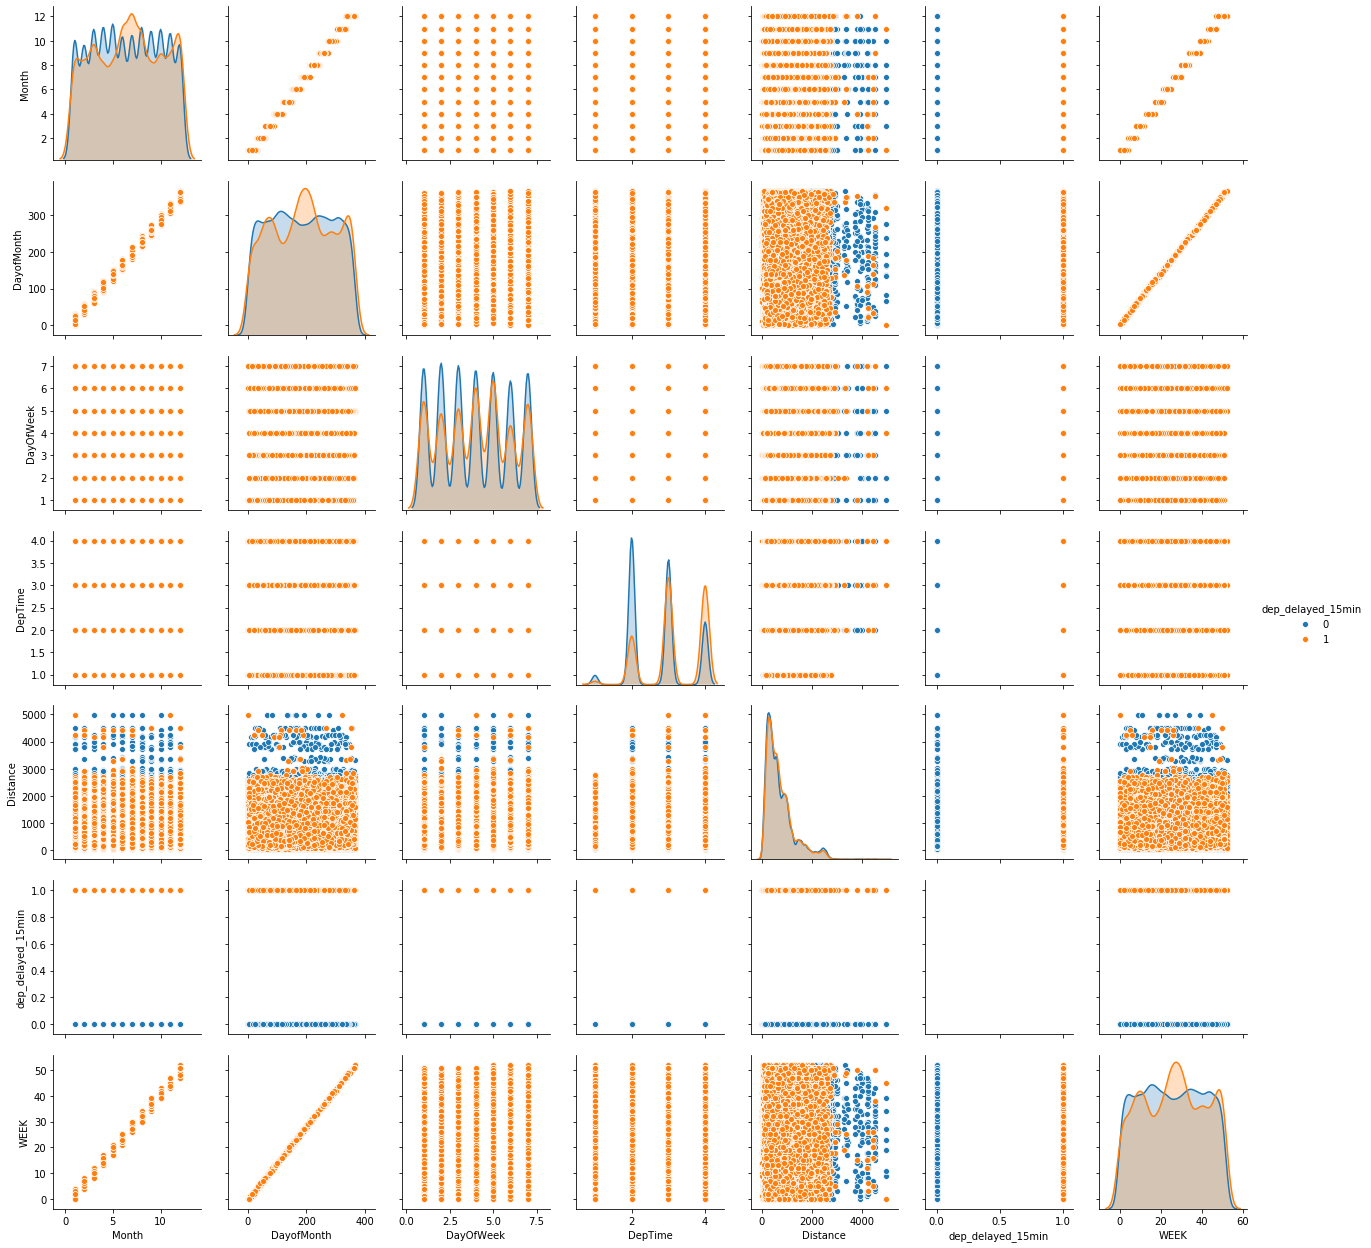

In [53]:
sns.pairplot(df, hue='dep_delayed_15min')